In [32]:
import pandas as pd

df = pd.read_csv('C:\TJ_FInal_Project\Gina\지식인크롤링\combined_output.csv')
print(df.info())
print(df.isna().sum())
print(df.iloc[1,1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119127 entries, 0 to 119126
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  119127 non-null  object
 1   Answer    115789 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB
None
Question       0
Answer      3338
dtype: int64
질문자님 안녕하세요.​주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??​출금은 무조건 마지막 매도를 기준으로 D+2거래일이 지나야 출금이 가능합니다.출금계획이 있으시다면 D+2거래일 동안 매매를 하지 않는 것이 계획한대로 출금하는데 원활 할 수 있습니다.​답변이 조금이나마 도움되셨길 바라겠습니다^^[지식인 답변을 댓가로 네임카드 업체를 이용중입니다.]


In [33]:
df_missing = df[df.isnull().any(axis=1)]  # 결측값이 있는 행만 추출
df_missing

,Question,Answer
126,예수금 출금이 안됩니다. 저번주 22일 목요일에 600만원가량을 매도하였고오늘 출금...,NaN
2220,(고등학생) 농협체크카드 발급 준비물! 인터넷 쇼핑몰에서 뭘 구매하고 싶어도 카드가...,NaN
2222,ATM으로 무통장입금 하는법 안녕하세요 무통장 입금을해야하는데 처음이라 잘몰라서 몇...,NaN
2224,국민은행에서 적금을 하나들려고 하는데요 직장생활한지는 얼마 안됐구요어디 모아두는데가...,NaN
2232,송금 계좌이체 안녕하세요이거 내공 100드릴테니까 정확하게 질문한 거 다 답해주시면...,NaN
...,...,...
117096,한국투자증권 제가 한국투자증권 통장이 있는데요 영업점을 가지않고 인터넷으로 인터넷뱅...,NaN
117097,"Isa계좌... Isa계좌 해 놨는데, 이건 계속 존재하는 상품인가요?만기 되면 또...",NaN
117098,계좌번호 잊어버려었요 만약 진주 지점없어서 대리인이 안산지점에서하면 가족관계증명서하...,NaN
117099,계좌번호 실종 전화하면 등록된 정보2가지 알면된다고한다고했는데.2가지정보가 뭐예요?,NaN


In [34]:
df_cleaned = df.dropna()  # 결측값이 있는 행 제거
df_cleaned.reset_index(drop=True, inplace=True)

# 제거할 여러 문구 리스트
remove_phrases = [
    "질문자님 안녕하세요.",
    "안녕하세요.주식에 주자도 모르는 초보인데요...",
    "답변이 조금이나마 도움되셨길 바라겠습니다^^[지식인 답변을 댓가로 네임카드 업체를 이용중입니다.]"
    "답변이 조금이나마 도움되셨길 바라겠습니다"
    "안녕하세요."
    "질문자님"
    "안녕하세요~ 답변이 도움되셨음 좋겠네요~ 좋은 하루 되세요~~"
    "안녕하세요 해외선물 소망에셋 입니다^-^​질문자님의 소중한 글을 읽어 보았습니다."
    "✥ 안녕하세요, 주식,증권 분야 지식iN 절대신 TesTia입니다. ✥​✅️"
    "​● 파이코인(Pi Coin) 소개 및 초간단 채굴방법​, 전망https://m.blog.naver.com/ss138027/222219137601​● 비코인(Bee Coin) 소개 및 초간단 채굴방법​​​https://m.blog.naver.com/ss138027/222219415770​​● 비키원코인(VikiOne Coin) 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222353172038​● 타임스토프 소개 및 초간단 채굴방법​https://m.blog.naver.com/ss138027/222219382859​​● 이글코인(Eagle Coin) 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222266420936​​● 파이퓨처스 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222225334152​​● 알파코인(Alpha Coin) 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222375953320​● 스페라엑스(Sperax)코인 소개 및 초간단 채굴방법​https://m.blog.naver.com/ss138027/222274514468​​● Vswap코인 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222241482957​​● 앤트코인(Ant 코인) 소개 및 초간단 채굴방법​https://m.blog.naver.com/ss138027/222283009663​​● 미도인코인 소개 및 초간단 채굴방법https://m.blog.naver.com/ss138027/222219314637​​● 페이팔(Q코인) 소개 및 초간단 채굴방법​​https://m.blog.naver.com/ss138027/222290197507​​#파이코인#비코인#pi코인#bee코인#이글코인#타임스토프"
    
]

# Question과 Answer 컬럼에서 여러 문구 제거
for phrase in remove_phrases:
    df['Question'] = df_cleaned['Question'].str.replace(phrase, '', regex=False)
    df['Answer'] = df_cleaned['Answer'].str.replace(phrase, '', regex=False)

print(df)

                                                 Question  \
0       20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...   
1       주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??   
2       주식 출금가능금액 질문이요... 제가 학생이라 10만원정도가 있는데 그중 8만정도가...   
3       안녕하세요, 가치 투자의 진정한 뜻이... 안녕하세요,가치 투자의 진정한 뜻이 궁금...   
4       [주식] 체결 후 입금이 안 되네요~ 주식을 매도 했습니다 .보유 주식에도 빠져 나...   
...                                                   ...   
119122                                                NaN   
119123                                                NaN   
119124                                                NaN   
119125                                                NaN   
119126                                                NaN   

                                                   Answer  
0       질문자님 안녕하세요.​20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...  
1       질문자님 안녕하세요.​주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...  
2       질문자님 안녕하세요.​주식 출금가능금액 질문이요...제가 학생이라 10만원정도가 있...  
3       질문자님 안녕하세요.​안녕하세요,가

In [35]:
df_cleaned.to_csv('cleaned_combined_output.csv', index=False)  # 결측값 제거 후 저장

In [36]:
df = pd.read_csv('cleaned_combined_output.csv')
print(df)

                                                 Question  \
0       20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...   
1       주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??   
2       주식 출금가능금액 질문이요... 제가 학생이라 10만원정도가 있는데 그중 8만정도가...   
3       안녕하세요, 가치 투자의 진정한 뜻이... 안녕하세요,가치 투자의 진정한 뜻이 궁금...   
4       [주식] 체결 후 입금이 안 되네요~ 주식을 매도 했습니다 .보유 주식에도 빠져 나...   
...                                                   ...   
115784  울분 화병은 가만있다가 과거 안좋은기억 때문에 울화가치밀어서 가슴이 답답해서 소리지...   
115785  고1 수학 공부 지금 예비고1이라 고1수학 선행하고 있는데 지금 다항식의 연산 기본...   
115786  상가 임대차에 관한 문의드립니다 기존매장 인수를하는데 기존 상가임대차계약이 25년 ...   
115787  군대 질문 요번에 3월에 가는 해병대 동반입대에 지원했는데 만약에 1차합격을 한 상...   
115788  광주 영구 눈썹문신 샵 광주광역시 반영구 눈썹 말구 영구 눈썹 문신 샵들 좀 알려주...   

                                                   Answer  
0       질문자님 안녕하세요.​20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...  
1       질문자님 안녕하세요.​주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...  
2       질문자님 안녕하세요.​주식 출금가능금액 질문이요...제가 학생이라 10만원정도가 있...  
3       질문자님 안녕하세요.​안녕하세요,가

In [37]:
question_list = df['Question']
answer_list = df['Answer']

print(question_list)
print(answer_list)

0         20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...
1         주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??
2         주식 출금가능금액 질문이요... 제가 학생이라 10만원정도가 있는데 그중 8만정도가...
3         안녕하세요, 가치 투자의 진정한 뜻이... 안녕하세요,가치 투자의 진정한 뜻이 궁금...
4         [주식] 체결 후 입금이 안 되네요~ 주식을 매도 했습니다 .보유 주식에도 빠져 나...
                                ...                        
115784    울분 화병은 가만있다가 과거 안좋은기억 때문에 울화가치밀어서 가슴이 답답해서 소리지...
115785    고1 수학 공부 지금 예비고1이라 고1수학 선행하고 있는데 지금 다항식의 연산 기본...
115786    상가 임대차에 관한 문의드립니다 기존매장 인수를하는데 기존 상가임대차계약이 25년 ...
115787    군대 질문 요번에 3월에 가는 해병대 동반입대에 지원했는데 만약에 1차합격을 한 상...
115788    광주 영구 눈썹문신 샵 광주광역시 반영구 눈썹 말구 영구 눈썹 문신 샵들 좀 알려주...
Name: Question, Length: 115789, dtype: object
0         질문자님 안녕하세요.​20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...
1         질문자님 안녕하세요.​주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...
2         질문자님 안녕하세요.​주식 출금가능금액 질문이요...제가 학생이라 10만원정도가 있...
3         질문자님 안녕하세요.​안녕하세요,가치 투자의 진정한 뜻이 궁금합니다.그건 어느 시점...
4         질문자님 안녕하세요.​[주식] 체결 후 입금이 안 되네요~​주식을 매도 했습니다

In [38]:
import re

def clean_strings(strings):
    cleaned_strings = []
    for s in strings:
        if isinstance(s, str):  # 문자열인 경우만 처리
            s = re.sub(r'[^\w\s.?%]', ' ', s)     # .?% 제외 space로 대치
            s = re.sub(r'[\n\t]', ' ', s)         # \n, \t space로 대치
            s = re.sub(r'ㆍ', ' ', s)             # 배꼽 space로 대치
            s = re.sub(r'\.{2,}', ' ', s)         # 두 개 이상의 마침표를 하나의 공백으로 대치
            s = re.sub(r'\s+', ' ', s)            # 여러 개의 공백을 하나의 공백으로 대치
            s = s.strip()                         # 문자열 앞뒤의 공백 제거
            s = re.sub(r'https?://[^\s]+', '', strings) # url 패턴 지우기 
            s = re.sub(r'[^가-힣\s]', '', s) # url 패턴 지우기
            cleaned_strings.append(s)
        else:
            cleaned_strings.append('')  # 문자열이 아닌 경우 빈 문자열 추가
    return cleaned_strings

question_list = clean_strings(question_list)
answer_list = clean_strings(answer_list)

new_df = pd.DataFrame({
  'Question' : question_list,
  'Answer' : answer_list
})

# 중복된 열 제거 
df = new_df.drop_duplicates()
print(df.duplicated().sum())
print(len(df))

TypeError: expected string or bytes-like object

In [8]:
df.reset_index(drop=True, inplace=True)
print(df)

                                                 Question  \
0       20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...   
1       주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??   
2       주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주식...   
3       안녕하세요 가치 투자의 진정한 뜻이 안녕하세요 가치 투자의 진정한 뜻이 궁금합니다....   
4       주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 .보유 주식에도 빠져 나갔구요...   
...                                                   ...   
111923  울분 화병은 가만있다가 과거 안좋은기억 때문에 울화가치밀어서 가슴이 답답해서 소리지...   
111924  고1 수학 공부 지금 예비고1이라 고1수학 선행하고 있는데 지금 다항식의 연산 기본...   
111925  상가 임대차에 관한 문의드립니다 기존매장 인수를하는데 기존 상가임대차계약이 25년 ...   
111926  군대 질문 요번에 3월에 가는 해병대 동반입대에 지원했는데 만약에 1차합격을 한 상...   
111927  광주 영구 눈썹문신 샵 광주광역시 반영구 눈썹 말구 영구 눈썹 문신 샵들 좀 알려주...   

                                                   Answer  
0       질문자님 안녕하세요. 20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...  
1       질문자님 안녕하세요. 주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...  
2       질문자님 안녕하세요. 주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데...  
3       질문자님 안녕하세요. 안녕하세요 가

In [9]:
df.to_csv('./processed_jisikin.csv', index=False)
df

,Question,Answer
0,20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...,질문자님 안녕하세요. 20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...
1,주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??,질문자님 안녕하세요. 주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...
2,주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주식...,질문자님 안녕하세요. 주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데...
3,안녕하세요 가치 투자의 진정한 뜻이 안녕하세요 가치 투자의 진정한 뜻이 궁금합니다....,질문자님 안녕하세요. 안녕하세요 가치 투자의 진정한 뜻이 궁금합니다.그건 어느 시점...
4,주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 .보유 주식에도 빠져 나갔구요...,질문자님 안녕하세요. 주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 . 보유...
...,...,...
111923,울분 화병은 가만있다가 과거 안좋은기억 때문에 울화가치밀어서 가슴이 답답해서 소리지...,울분과 화병은 과거의 부당한 대우나 상처로 인해 쌓인 분노와 억울함이 원인이 되는 ...
111924,고1 수학 공부 지금 예비고1이라 고1수학 선행하고 있는데 지금 다항식의 연산 기본...,다항식의 연산 공식은 처음에는 외우는 것이 중요합니다. 하지만 외우는 것만으로는 부...
111925,상가 임대차에 관한 문의드립니다 기존매장 인수를하는데 기존 상가임대차계약이 25년 ...,질문 1 기존 임대차계약이 2025년 3월까지 남아 있는 경우 임차인은 계약기간이 ...
111926,군대 질문 요번에 3월에 가는 해병대 동반입대에 지원했는데 만약에 1차합격을 한 상...,아닙니다. 동반입대는 한 번만 신청할 수 있습니다. 이미 해병대 동반입대에 1차 합...


In [10]:
df = pd.read_csv('./processed_jisikin.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111928 entries, 0 to 111927
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  109971 non-null  object
 1   Answer    111925 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
None


#### 문자열 길이 조절

\Question 열 길이:
최대 길이: 10852, 최소 길이: 0, 평균 길이: 140.54
\Answer 열 길이:
최대 길이: 52819, 최소 길이: 0, 평균 길이: 1044.59


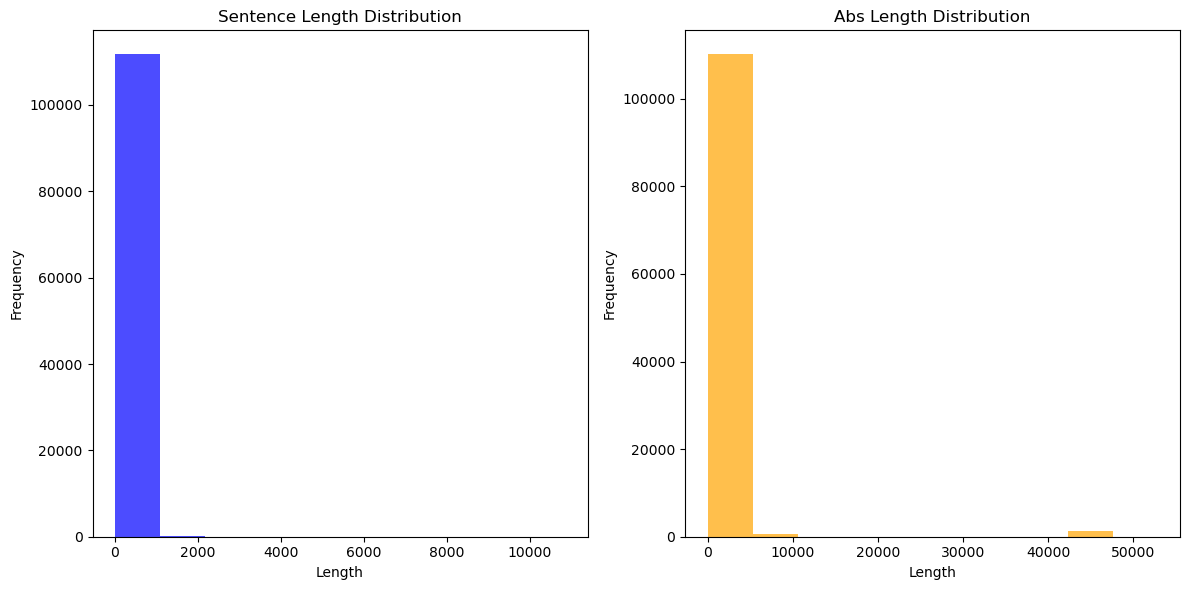

In [12]:
import matplotlib.pyplot as plt

def data_length_distribution(df, sentence='Question', abs='Answer'):
  # 문자열로 변환하고 NaN을 빈 문자열로 대체
  df[sentence] = df[sentence].fillna('').astype(str)
  df[abs] = df[abs].fillna('').astype(str)
  
  df['sentence_length'] = df[sentence].apply(len)
  df['abs_length'] = df[abs].apply(len)

  sentence_max_length = df['sentence_length'].max()
  sentence_min_length = df['sentence_length'].min()
  sentence_mean_length = df['sentence_length'].mean()

  abs_max_length = df['abs_length'].max()
  abs_min_length = df['abs_length'].min()
  abs_mean_length = df['abs_length'].mean()

  print("\Question 열 길이:")
  print(f"최대 길이: {sentence_max_length}, 최소 길이: {sentence_min_length}, 평균 길이: {sentence_mean_length:.2f}")

  print("\Answer 열 길이:")
  print(f"최대 길이: {abs_max_length}, 최소 길이: {abs_min_length}, 평균 길이: {abs_mean_length:.2f}")

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df['sentence_length'], bins=10, color='blue', alpha=0.7)
  plt.title('Sentence Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df['abs_length'], bins=10, color='orange', alpha=0.7)
  plt.title('Abs Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['sentence_length','abs_length'])
  
data_length_distribution(df)

\Question 열 길이:
최대 길이: 100, 최소 길이: 0, 평균 길이: 81.46
\Answer 열 길이:
최대 길이: 200, 최소 길이: 0, 평균 길이: 167.65


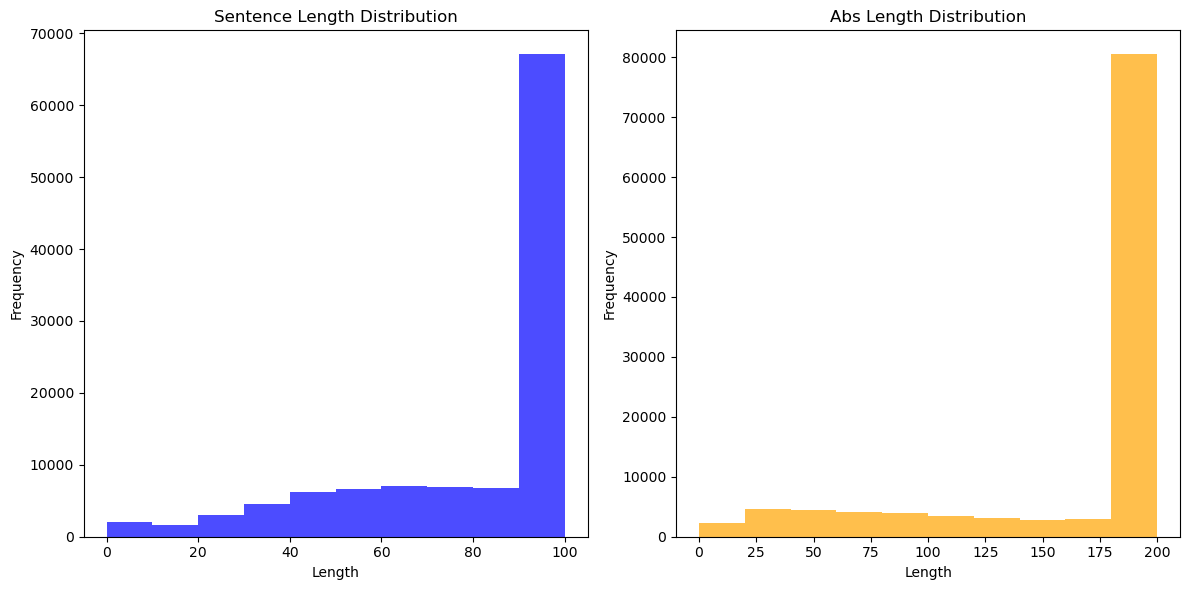

길이 제한 전 데이터 프레임 길이 : 111928
길이 제한 후 데이터 프레임 길이 : 111928
삭제 된 행 : 0


In [13]:
pre_length = len(df)

# Question 열에서 150자 이상인 문자열을 자르고, Answer 열에서 80자 이상인 문자열을 자름
df['Question'] = df['Question'].str.slice(0, 100)
df['Answer'] = df['Answer'].str.slice(0, 200)

# df = df[(df['Question'].str.len() > 10) & (df['Question'].str.len() < 150)]
# df = df[(df['Answer'].str.len() > 10) & (df['Answer'].str.len() < 80)] # & (df['abs'].str.len() < 150)

data_length_distribution(df)

after_length = len(df)

print(f'길이 제한 전 데이터 프레임 길이 : {pre_length}')
print(f'길이 제한 후 데이터 프레임 길이 : {after_length}')
print(f'삭제 된 행 : {pre_length-after_length}')

In [14]:
df.to_csv('./processed_jisikin_final.csv', index=False)
print(df)

                                                 Question  \
0       20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 ...   
1       주식 주문관련금액 주문관련금액에 8만원이 있는데 출금은 못하나고 주문만 할수있는건가요??   
2       주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주식...   
3       안녕하세요 가치 투자의 진정한 뜻이 안녕하세요 가치 투자의 진정한 뜻이 궁금합니다....   
4       주식 체결 후 입금이 안 되네요 주식을 매도 했습니다 .보유 주식에도 빠져 나갔구요...   
...                                                   ...   
111923  울분 화병은 가만있다가 과거 안좋은기억 때문에 울화가치밀어서 가슴이 답답해서 소리지...   
111924  고1 수학 공부 지금 예비고1이라 고1수학 선행하고 있는데 지금 다항식의 연산 기본...   
111925  상가 임대차에 관한 문의드립니다 기존매장 인수를하는데 기존 상가임대차계약이 25년 ...   
111926  군대 질문 요번에 3월에 가는 해병대 동반입대에 지원했는데 만약에 1차합격을 한 상...   
111927  광주 영구 눈썹문신 샵 광주광역시 반영구 눈썹 말구 영구 눈썹 문신 샵들 좀 알려주...   

                                                   Answer  sentence_length  \
0       질문자님 안녕하세요. 20영업일 계좌개설 제한2021.06.09 에 계좌개설했는데 ...               58   
1       질문자님 안녕하세요. 주식 주문관련금액주문관련금액에 8만원이 있는데 출금은 못하나고...               49   
2       질문자님 안녕하세요. 주식 출금가능금액 질문이

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm

question_list = df['Question']
answer_list = df['Answer']

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    question_list + answer_list, target_vocab_size = 2**12  #목표 어휘 크기, 약 16,384개의 서브워드를 생성하는 설정
)

In [17]:
# tokenizer.save_to_file('tokenizer')
# tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('tokenizer')

# print(f'토큰 크기: {tokenizer.vocab_size}')
# print(f'\n토큰 예시: {tokenizer.subwords[:30]}')
# print(f'\n인코딩 테스트 - 전: {question_list[:1]}')
# encodingList = tokenizer.encode(question_list[:1])
# print(f'\n인코딩 테스트 - 후: {encodingList}')

# Save the tokenizer to a file
tokenizer.save_to_file('tokenizer')

# Load the tokenizer from the file
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('tokenizer')

# Print tokenizer information
print(f'Tokenizer vocabulary size: {tokenizer.vocab_size}')
print(f'\nToken examples: {tokenizer.subwords[:30]}')

# Encoding test
first_question = question_list[0]  # Access the first question string
print(f'\nEncoding test - Before: {first_question}')
encoding_list = tokenizer.encode(first_question)  # Pass the string directly
print(f'\nEncoding test - After: {encoding_list}')

Tokenizer vocabulary size: 4083

Token examples: ['. ', '을_', '이_', '에_', '는_', '의_', '은_', '가_', '를_', '주식_', '로_', '입니다', '으로_', '도_', '수_', '고_', '이', '? ', '있습니다', '합니다', '면_', '한_', '서_', '에서_', '가', '만_', '됩니다', '게_', '시', '요']

Encoding test - Before: 20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 제한 언제 풀리나요??

Encoding test - After: [313, 1777, 2353, 2236, 1912, 3873, 3744, 3873, 3489, 3859, 4, 1084, 365, 313, 1777, 2353, 2236, 1257, 1941, 47, 71, 213]


In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm
import pandas as pd

# 데이터프레임에서 Question과 Answer 컬럼 가져오기
question_list = df['Question'].tolist()
answer_list = df['Answer'].tolist()

# 서브워드 토크나이저 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    question_list + answer_list, target_vocab_size=2**14  # 목표 어휘 크기, 약 16,384개의 서브워드를 생성하는 설정
)

# 토크나이저 저장
tokenizer.save_to_file('tokenizer')

# 저장된 토크나이저 로드
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('tokenizer')

# 토큰 크기 출력
print(f'토큰 크기: {tokenizer.vocab_size}')

# 토큰 예시 출력 (처음 30개의 서브워드)
print(f'\n토큰 예시: {tokenizer.subwords[:30]}')

# 인코딩 테스트 - 리스트에서 첫 번째 질문을 인코딩
first_question = question_list[0]  # 첫 번째 질문을 문자열로 가져오기
print(f'\n인코딩 테스트 - 전: {first_question}')
encoding_list = tokenizer.encode(first_question)  # 문자열로 변환된 질문 인코딩
print(f'\n인코딩 테스트 - 후: {encoding_list}')


토큰 크기: 16369

토큰 예시: ['. ', '이_', '는_', '주식_', '에_', '을_', '의_', '수_', '은_', '? ', '가_', '를_', '있습니다', '입니다', '도_', '로_', '고_', '으로_', '안녕하세요_', '합니다', '주식을_', '됩니다', '있는_', '면_', '에서_', '제가_', '과_', '한_', '만_', '서_']

인코딩 테스트 - 전: 20영업일 계좌개설 제한 2021.06.09 에 계좌개설했는데 20영업일 계좌개설 제한 언제 풀리나요??

인코딩 테스트 - 후: [12006, 1250, 2802, 1905, 16159, 3908, 16159, 3907, 5, 1988, 244, 12006, 1250, 2802, 575, 5664, 64, 86]


In [20]:
beforeQuestion = question_list[2]
beforeAnswer = answer_list[2]

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size+1]
VOCAB_SIZE = tokenizer.vocab_size + 2

QUE_MAX_LENGTH = 199
ANS_MAX_LENGTH = 799

def tokenized_and_padding(question_list, answer_list):
  tokenized_question, tokenized_answer = [], []
  
  for (question, answer) in zip(question_list, answer_list):
    question = START_TOKEN + tokenizer.encode(question) + END_TOKEN
    answer = START_TOKEN + tokenizer.encode(answer) + END_TOKEN
    
    tokenized_question.append(question)
    tokenized_answer.append(answer)
    
  tokenized_question = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_question, maxlen=QUE_MAX_LENGTH, padding='post'
    )
  tokenized_answer = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_answer, maxlen=ANS_MAX_LENGTH, padding='post'
  )
  
  return tokenized_question, tokenized_answer

question_list, answer_list = tokenized_and_padding(question_list, answer_list)

print(f'sentence 원본 : {beforeQuestion}')
print(f'\nsentence 토큰화 및 패딩 결과 : {question_list[2]}')
print(f'\nabs 원본 : {beforeAnswer}')
print(f'\nabs 토큰화 및 패딩 결과 : {answer_list[2]}')

sentence 원본 : 주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주식에들어가있어요 그럼 출금가능금액은 2만원인데 출금가능금액이 40000만원 이길래 한번 빼봤더니 2

sentence 토큰화 및 패딩 결과 : [16369     4 11768  1081    26 14698 16145  2290  3810   140   206   125
 16169   219  3810  6310  1072  2132   374  5716     9  3318   171  9226
  8740  9271    53  2204   166  2094 13509 16145 16163 16370     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0]

abs 원본 : 질문자님 안녕하세요. 주식 출금가능금액 질문이요 제가 학생이라 10만원정도가 있는데 그중 8만정도가 주식에들어가있어요 그럼 출금가능금액은 2만원인데 출금가능금액이 40000만원 이길래 한번 빼봤더니 20000이 되더라구요 이런적은 처음이라 설명해주실분 찾아요 출금은 무조건 매도일 기준으로 D 2거래일 후에 출금이 가능합니다.하지만 급전이 필요한 사람들을 위

abs 토큰화 및 패딩 결과 : [16369   111    33     1   

In [21]:
question_list_tf = tf.convert_to_tensor(question_list)
answer_list_tf =tf.convert_to_tensor(answer_list) 

In [22]:
import pickle

# question_list_tf를 pickle 파일로 저장
with open('sentences.pkl', 'wb') as f:
    pickle.dump(question_list_tf, f)

# abs를 pickle 파일로 저장
with open('abs.pkl', 'wb') as f:
    pickle.dump(answer_list_tf, f)

print("Pickle 파일 저장 완료")

Pickle 파일 저장 완료
